In [1]:
import pandas as pd
import numpy as np
import bluebelt as blue
import matplotlib.pyplot as plt

In [2]:
nrows = 105
ncols = 4

np.random.seed(27)
series = pd.Series(np.random.weibull(7,nrows) * 100, index=pd.date_range(start='2019-12-16', periods=nrows), name='process A')
frame = pd.DataFrame(np.random.normal(loc=100, scale=20, size=ncols*nrows).reshape(nrows, ncols), index=pd.date_range(start='2019-12-02', periods=nrows), columns=[f'skill {col}' for col in range(1, ncols+1)])

series[series.sample(5).index] = np.nan # break the series
for col in frame.columns:
    frame.at[frame.sample(5).index, col] = np.nan # break the frame

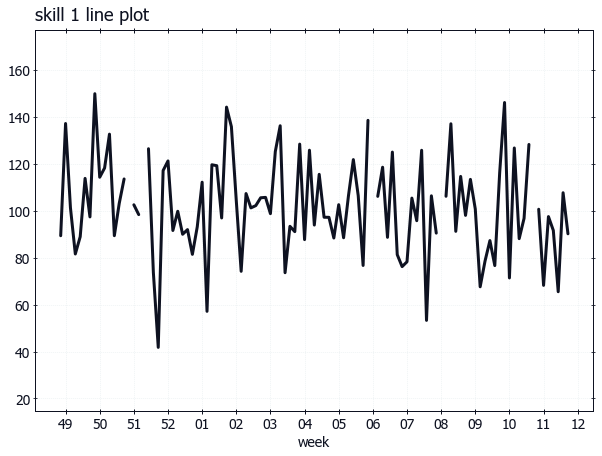

In [4]:
frame['skill 1'].blue.line()

In [3]:
index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
last_week = pd.DataFrame(index=index, data={
    'skill 1': [15, 12, 15, 10, 8],
    'skill 2': [6, 11, 16, 7, 6],
    'skill 3': [6, 15, 11, 10, 12],
})
this_week = pd.DataFrame(index=index, data={
    'skill 1': [3, 3, 5, 5, 6],
    'skill 2': [18, 17, 10, 12, 13],
    'skill 3': [2, 3, 5, 4, 2],
})

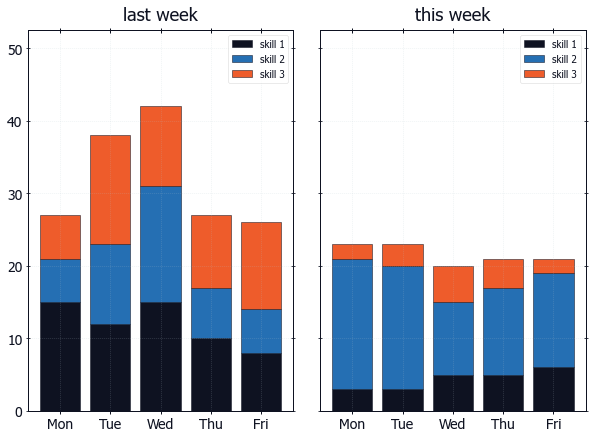

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw={'wspace': 0.1, 'hspace': 0}, sharey=True)


width = 0.8       # the width of the bars: can also be len(x) sequence

last_values = np.zeros(last_week.shape[0])
for col in last_week.columns:
    ax[0].bar(last_week.index, last_week[col].values, width=width, bottom=last_values, label=col)
    last_values += last_week[col].values

last_values = np.zeros(this_week.shape[0])
for col in this_week.columns:
    ax[1].bar(this_week.index, this_week[col].values, width=width, bottom=last_values, label=col)
    last_values += this_week[col].values
        
ax[0].set_title('last week')
ax[1].set_title('this week')

ax[0].legend()
ax[1].legend()

plt.show()

#### Q: the total volume difference between this week and last week
if this week > last week: q = this week - last week / this week\
if this week < last week: q = last week - this week / last week

#### D: the difference of the distribution of hours between the workdays of this week and last week
sum of absolute difference between this weeks hour per day and last weeks normalised hours per day, divided by the sum of this weeks hours\

#### S: the difference of the distribution of skills between the workdays of this week and last week
sum of absolute difference between this weeks hour per day per skill and last weeks normalised hours per day per skill, divided by the sum of this weeks hours



In [5]:
effort = frame.blue.planning.effort()
effort

Effort(n=105, qds=0.2515, quantity=0.0700, distribution=0.0862, skills=0.1202)

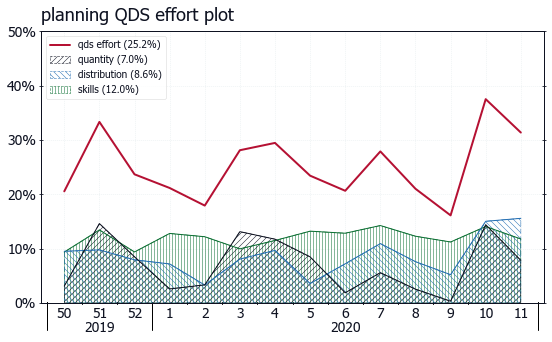

In [6]:
effort.plot(figsize=(9,5), ylim=(0,.5))

In [7]:
ease = frame.blue.planning.ease()
ease

Ease(n=105, qds=0.7485, quantity=0.9300, distribution=0.9138, skills=0.8798)

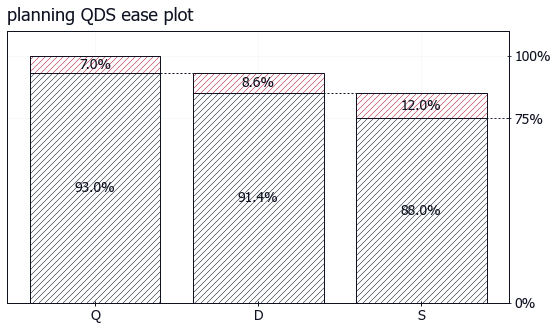

In [8]:
ease.plot(figsize=(9,5))